# Demo notebook for Kamodo's Reconstruction: Spherical Coordinates
This notebook tutorial shows how to fly a constellation of satellites through model data as a virtual reality, focusing on spherical coordinate examples.

In [1]:
#Get trajectory data from an old GDC trajectory file. 
#This trajectory was designed to be approximately stationary in GSE coordinates. Performing the reconstruction in GSE
#   coordinates can sometimes result in some surprising plots depending on the inputs chosen.
#Alternatively, you can get a real trajectory using the flythrough's SatelliteTrajectory function, or a sample
#  trajectory through the SampleTrajectory function. See the SF_Traj_Coord_Plots demo notebook for examples.
from kamodo_ccmc.flythrough.Reconstruction_v0 import read_GDC_sattraj, RECON
file_dict = read_GDC_sattraj('C:/Users/rringuet/Kamodo_WinDev1/Reconstruction/GDCFiles/')  #change to match your machine
#coordinates in GDZ spherical: 'UTCtimestamps' in s, 'Longitude' in deg, 'Latitude' in deg, 'Altitude' in km
print(file_dict['UTCtimestamps'].min(), file_dict['UTCtimestamps'].max())  #min and max for later comparison to data

C:\Users\rringuet\.conda\envs\Kamodo_Dev\lib\site-packages\spacepy\time.py:2365: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


1552773600.0 1552960800.0


In [2]:
#Find out what models are available
#The models available through the flythrough are automatically available through the reconstruction function.
from kamodo_ccmc.flythrough import model_wrapper as MW
MW.Choose_Model('')

Possible models are: {0: 'CTIPe', 1: 'GITM', 2: 'IRI', 3: 'SWMF_IE', 4: 'TIEGCM', 5: 'OpenGGCM_GM'}
Integers or strings allowed.


In [3]:
#For a given model, find out what time ranges are covered by the data in a given directory.
model = 'GITM'
file_dir = 'D:/GITM/Data/jasoon_shim_071418_IT_1_tenth/'  #change to match your machine
times = MW.File_Times(model, file_dir)
#This function also automatically performs any data preparation needed.

File pattern: UTC time ranges
------------------------------------------
D:/GITM/Data/jasoon_shim_071418_IT_1_tenth/*150317 : ['2015-03-17 00:00:00', '2015-03-18 00:00:00', 1426550400.0, 1426636800.0, 601.0000000000013]
D:/GITM/Data/jasoon_shim_071418_IT_1_tenth/*150318 : ['2015-03-18 00:00:00', '2015-03-19 00:00:00', 1426636800.0, 1426723200.0, 601.0000000000076]
D:/GITM/Data/jasoon_shim_071418_IT_1_tenth/*150319 : ['2015-03-19 00:00:00', '2015-03-19 01:50:00', 1426723200.0, 1426729800.0, 600.0000000000002]


In [4]:
#Shift times in example trajectory to match model data time range. 
#Some of the trajectory at the end will be automatically excluded later if not covered by the data.
time_diff = file_dict['UTCtimestamps'].min()-1426550400
file_dict['sat_time'] = file_dict['UTCtimestamps']-time_diff
print(file_dict['sat_time'].min(), file_dict['sat_time'].max())
#Make sure the data you choose covers at least half the time range of the trajectory.

1426550400.0 1426737600.0


In [5]:
#Convert coordinates to system desired for reconstruction to take place in.
#See SF_Traj_Coords_Plots notebook for more details.
from kamodo_ccmc.flythrough.utils import ConvertCoord
coord_type, coord_grid = 'GEO', 'sph'  #choose coordinate system to perform reconstruction in.
c1, c2, c3, units = ConvertCoord(file_dict['sat_time'], file_dict['Longitude'], file_dict['Latitude'], 
                                 file_dict['Altitude'], 'GDZ', 'sph', coord_type, coord_grid)
print('c1=longitude:',c1[:10])
print('c2=latitude:',c2[:10])
print('c3=radius:',c3[:10])
print('units (c1,c2,c3):',units)

#Show trajectory
from kamodo_ccmc.flythrough.plots import SatPlot4D  #plot commented out for storage considerations
#SatPlot4D('sat_time',file_dict['sat_time'],c1,c2,c3,file_dict['sat_time'],'s',coord_type, coord_grid, 
#          'GEO','all','None',body='black')

c1=longitude: [-143.9558774 -143.9204788 -143.8850757 -143.8496643 -143.8142414
 -143.7788033 -143.7433465 -143.7078677 -143.6723631 -143.6368294]
c2=latitude: [0.10519253 0.42438003 0.74356712 1.06275349 1.38193883 1.70112284
 2.02030521 2.33948562 2.65866377 2.97783935]
c3=radius: [1.06387035 1.06387037 1.06387041 1.06387046 1.0638705  1.06387055
 1.0638706  1.06387067 1.06387072 1.06387077]
units (c1,c2,c3): ['deg', 'deg', 'R_E']


In [6]:
#What are the variable names available in my data?
MW.File_Variables(model, file_dir)
#variable name, description, variable number, coordinate type, coordinate grid, list of coordinate names, units of data


The file D:/GITM/Data/jasoon_shim_071418_IT_1_tenth/*150317 contains the following standardized variable names:
-----------------------------------------------------------------------------------
SLT : '['solar local time', 63, 'SPH', 'sph', ['time', 'lon', 'lat'], 'hr']'
SZA : '['solar zenith angle', 48, 'SPH', 'sph', ['time', 'lon', 'lat'], 'radians']'
TEC : '['vertical total electron content (height integrated from bottom to top boundary)', 91, 'SPH', 'sph', ['time', 'lon', 'lat'], '10**16/m**2']'
T_n : '['neutral temperature', 31, 'SPH', 'sph', ['time', 'lon', 'lat', 'radius'], 'K']'
rho_N2 : '['mass density of molecular nitrogen', 13, 'SPH', 'sph', ['time', 'lon', 'lat', 'radius'], 'kg/m**3']'
rho_N2plus : '['mass density of molecular nitrogen ion', 14, 'SPH', 'sph', ['time', 'lon', 'lat', 'radius'], 'kg/m**3']'
rho_NO : '['mass density of nitric oxide', 20, 'SPH', 'sph', ['time', 'lon', 'lat', 'radius'], 'kg/m**3']'
rho_NOplus : '['mass density of nitric oxide ion', 21, 'SPH', '

In [7]:
#Bring up documentation for the reconstruction functionality.
help(RECON)

Help on class RECON in module kamodo_ccmc.flythrough.Reconstruction_v0:

class RECON(kamodo.kamodo.Kamodo)
 |  RECON(model, variable_name, file_dir, sat_time, c1, c2, c3, coord_type, coord_grid, recon_option, recon_dims, time_offsets=[0.0], c1_offsets=[0.0], c2_offsets=[0.0], c3_offsets=[0.0], dx=2.0, dy=2.0, d1=0.0, d2=0.0, LT='', t_avg='', c1_avg='', c2_avg='', c3_avg='', dt=60.0, run_option='all', **kwargs)
 |  
 |  Uses shifted copies of the satellite trajectory to reconstruct 
 |  the model data for the variable name given.
 |  
 |  - model: 'CTIPe', 'IRI', 'GITM', 'SWMF_IE', 'TIEGCM'
 |  - variable_name = choose from list of standardized variable names from model chosen
 |  - file_dir = file path to model data
 |  - sat_time: a numpy array of the utc timestamps
 |  - c1, c2, c3: numpy arrays of the positions correlating to the utc timestamps
 |      (c1, c2, c3) should be (x,y,z) in R_E for cartesian coordinates, and (lon, lat, 
 |      radius (R_E) or altitude (km)) for spherica

In [8]:
#Choose inputs.
variable_name = 'T_n'  #from chosen files above
recon_dimensions = 'c1c2'  #Longitude vs Latitude reconstruction for spherical coordinates
recon_option = 'AvgMod_AvgSlice'

#Set up constellation input:
lon_offsets = [0.,30.,60.,90.,120.,150.]  #6 satellites equally spaced in longitude
#lon_offsets, time_offsets = [0.,-30.,30.], [0.,-300.,300.]  #9 satellites in a longitude-time grid
#lon_offsets, lat_offsets = [0.,-30.,30.], [0.,-10.,10.]  #9 satellites in a longitude-latitude grid
print(c2.min(), c2.max())  #make sure latitude offsets won't bring the orbits beyond +/- 90 degrees latitude.
#If choosing height offsets and the height is in R_E, be careful to enter the offsets in R_E and not km.
#The offset lists give the offsets of the imaginary satellites with identical trajectories in the 
#  other dimensions (e.g. height). Offsets in height are also possible, but not popular.
#Note: Make sure to include the offsets chosen in the next block.

#Note: All offsets are combined to create a number of satellites equal to the multiplied length of each offset array.
#   e.g. lon_offset, lat_offset, time_offset = [-10.,0.,10.], [-10.,0.,10.], [-300.,0.,300.]
#   will yield a constellation of 27 satellites spaced as indicated in the offsets.

#Choose the grid resolution of reconstruction. The finer the resolution, the longer the program takes to run and 
#   the more 'holes' you will see in the reconstructed plot. Physically, these should be set to the instrument's 
#   field of view in the units of the input coordinate system (e.g. degrees for longitude and latitude, seconds for
#   time, etc).
dx, dy = 4., 2.  #Since recon_dimensions='c1c2', dx is resolution in longitude, and dy is the resolution in latitude.

-79.99895546095169 79.99894658694609


In [9]:
#Run the reconstruction.
#This process typically takes up to a few minutes, but can take up to ~2 hours or more depending on the amount of data 
#  used, the grid resolution chosen, the reconstruction method chosen, and whether conversion to pressure level is 
#  required. As originally set, the process takes about 30 seconds.
#Make sure to include all desired offsets in this block before executing.

recon = RECON(model, variable_name, file_dir, file_dict['sat_time'], c1, c2, c3, coord_type, coord_grid,
              recon_option, recon_dimensions, c1_offsets=lon_offsets, dx=dx, dy=dy)

Average time used for trajectories: 1426644000.0
Average c3 used for trajectories: 1.0638713559093769
Performing satellite constellation flythrough for 224646 locations...
Gridding data for LonLat...done in 20.44750s for 8281 gridpoints.

Average t used for model: 1426644000.0
Average c3 used for model: 1.0638713559093769
Performing averaged grid flythrough for 8281 locations...
Grid flythrough completed in 1.83996 s.
Reconstruction program complete in 29.46197 s.


In [10]:
#The output of the function is a Kamodo object with all of the default features described in documentation.
#T_n is the reconstructed data from the constellation flythrough. T_n_model is the data from the model in the 
#  method chosen. PercentDiff is the percent difference between the two, calculated using 
#  PercentDiff = (T_n_model - T_n)/T_n_model*100.
recon

{T_n(Lon, Lat): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x00000299B43561F8>, T_n: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x00000299B43561F8>, T_n_model(Lon, Lat): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x00000299B57CACA8>, T_n_model: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x00000299B57CACA8>, PercentDiff(Lon, Lat): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x00000299B43140D8>, PercentDiff: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x00000299B43140D8>}

In [11]:
#Show the reconstructed plot.
#Note the plots shown are given in the coordinate system associated with the input trajectory.
#Any gaps in the reconstructed plot indicate gaps in the satellite coverage of the plot grid chosen (dx and dy above),
#   and also depend on the constellation arrangement.

#recon.x and recon.y are the x and y grids of the plots.
recon.plot(T_n=dict(Lon=recon.x,Lat=recon.y))

In [12]:
#Show the corresponding model data
recon.plot(T_n_model=dict(Lon=recon.x,Lat=recon.y))

In [13]:
#Show the percent difference between the two. A percent difference of zero is an exact match.
#How well the reconstructed plot matches the model plot not only depends on the constellation arrangement,
#  but also on the reconstruction method chosen. The 'AvgMod_...' options typically result in the better
#  matches, but are not physically representative of what the constellation will 'see' in real data because
#  the two non-reconstructed dimensions are ignored in the input satellite trajectory (e.g. an average value 
#  for both height and time are used instead of the full range for a Lon-Lat reconstruction). The unmodified 
#  options ('Unmod_...') are thus recommended as the more physical comparison because the full set of input 
#  trajectory values are used.
recon.plot(PercentDiff=dict(Lon=recon.x,Lat=recon.y))

Text(0, 0.5, 'Frequency')

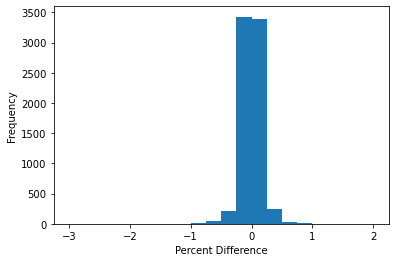

In [15]:
#Retrieve the percent difference data values and show in a histogram, ignoring NaN values.
#Some extra logic is required to automatically enforce bins of width 2%
import numpy as np
import matplotlib.pyplot as plt

pdiff_data = recon.PercentDiff()
data_min, data_max = np.floor(np.nanmin(pdiff_data)), np.ceil(np.nanmax(pdiff_data))
num_bins = int((data_max-data_min)/2.)
if num_bins<5: num_bins=20
hist, edges, patches = plt.hist(np.ravel(pdiff_data), range=(data_min,data_max),bins=num_bins)
plt.xlabel('Percent Difference')
plt.ylabel('Frequency')